# NSD Data Loader

This script illustrates usage of the NSD Data Loader Class.
For this class to work as intended nsd_access should be installed: https://github.com/tknapen/nsd_access
Both nsd_access and the data loader expect nsd data to be available in the original folder structure.

In [2]:
from NSD_DataLoader import NSDLoader
import os.path as op 

In [3]:
nsdfolder = op.join("..", "nsd") # adjust this to point to local copy of nsd dataset

nsdl = NSDLoader(nsdfolder)

Print a summary of the locally available data. This function will only show participants for which local data is available. It does so by checking for which participants beta data folders exist in the folder structure. It will therefore not catch whether data for all sessions has been downloaded. The number of available trials is read in from the behaviour data for each participant. The function returns a dictionary with each available subject as key and as value another dictionary of the form (Session: #Trials)

In [4]:
nsdl.get_data_info(verbose=True)

subj02
40 sessions available
30000 trials available
subj01
40 sessions available
30000 trials available


{'subj02': {1: 750,
  2: 750,
  3: 750,
  4: 750,
  5: 750,
  6: 750,
  7: 750,
  8: 750,
  9: 750,
  10: 750,
  11: 750,
  12: 750,
  13: 750,
  14: 750,
  15: 750,
  16: 750,
  17: 750,
  18: 750,
  19: 750,
  20: 750,
  21: 750,
  22: 750,
  23: 750,
  24: 750,
  25: 750,
  26: 750,
  27: 750,
  28: 750,
  29: 750,
  30: 750,
  31: 750,
  32: 750,
  33: 750,
  34: 750,
  35: 750,
  36: 750,
  37: 750,
  38: 750,
  39: 750,
  40: 750},
 'subj01': {1: 750,
  2: 750,
  3: 750,
  4: 750,
  5: 750,
  6: 750,
  7: 750,
  8: 750,
  9: 750,
  10: 750,
  11: 750,
  12: 750,
  13: 750,
  14: 750,
  15: 750,
  16: 750,
  17: 750,
  18: 750,
  19: 750,
  20: 750,
  21: 750,
  22: 750,
  23: 750,
  24: 750,
  25: 750,
  26: 750,
  27: 750,
  28: 750,
  29: 750,
  30: 750,
  31: 750,
  32: 750,
  33: 750,
  34: 750,
  35: 750,
  36: 750,
  37: 750,
  38: 750,
  39: 750,
  40: 750}}

Before loading the data, split it into training and test sets. The split is computed so that stimuli should only occur either in the training or the test set. (All repetitions of the same stimulus end up in the same set). The function accepts the approximate fraction of data to be held out for testing as test_fraction. Optionally only include stimuli that were shown to all participants

In [5]:
train_stims, test_stims = nsdl.create_image_split(test_fraction=.2, shared=True)
print(train_stims.shape)
print(test_stims.shape)
print(test_stims)   # pandas dataframe containing the stimulus ids 
                    # (cocoID to retrieve captions, 73KIDs used to get images and betas)


(800, 2)
(200, 2)
       cocoId  ID73K
26990  338987  26991
31747  357074  31748
40920  371353  40921
25250  332448  25251
19074  310870  19075
...       ...    ...
23492  325710  23493
9978   396793   9979
60505  203615  60506
46101  151163  46102
43746  404007  43747

[200 rows x 2 columns]


Next, retrieve all trials in which the selected stimuli were shown, for all subjects specified.

In [6]:
trialdata_train = nsdl.trials_for_stim(['subj01', 'subj02'], train_stims)
trialdata_test = nsdl.trials_for_stim(['subj01', 'subj02'], test_stims)
trialdata_train # for subjects that completed all 30000 trials 
                # each stimulus was shown three times, for two subjects this amounts to
                # 800 * 3 * 2 = 4800 trials in the training set with shared images

,SUBJECT,SESSION,RUN,TRIAL,73KID
0,1,1,1,1,46003
35,1,1,1,36,44981
44,1,1,1,45,32626
55,1,1,1,56,53053
56,1,1,1,57,4931
...,...,...,...,...,...
29919,2,40,11,45,12496
29929,2,40,11,55,52217
29943,2,40,12,6,30374
29953,2,40,12,16,12496


Finally, compute the session index and load the data. Images can be excluded to save memory.
The session index is needed to convert from the nsd indexing scheme:

    subject, session, run, trial

To the nsd_access indexing scheme:

    subject, session, trial
    
(I only have the first two sessions for subjects 1+2 available locally to save space, so I filter the data. This should not be necessary with the full dataset available.)

In [7]:
train_mask = (trialdata_train["SUBJECT"].isin([1,2])) & (trialdata_train["SESSION"].isin([1,2]))
test_mask = (trialdata_test["SUBJECT"].isin([1,2])) & (trialdata_test["SESSION"].isin([1,2]))
trialdata_train = nsdl.calculate_session_index(trialdata_train[train_mask])
trialdata_test = nsdl.calculate_session_index(trialdata_test[test_mask])

train_betas, train_captions, train_imgs = nsdl.load_data(trialdata_train)
test_betas, test_captions, test_imgs = nsdl.load_data(trialdata_test)

SESSION 1
loading annotations into memory...
Done (t=1.29s)
creating index...
index created!
loading annotations into memory...
Done (t=0.22s)
creating index...
index created!
SESSION 2
loading annotations into memory...
Done (t=1.21s)
creating index...
index created!
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
SESSION 1
loading annotations into memory...
Done (t=1.18s)
creating index...
index created!
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
SESSION 2
loading annotations into memory...
Done (t=1.20s)
creating index...
index created!
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
SESSION 1
loading annotations into memory...
Done (t=1.22s)
creating index...
index created!
loading annotations into memory...
Done (t=0.21s)
creating index...
index created!
SESSION 2
loading annotations into memory...
Done (t=1.21s)
creating index...
index created!
loading annotations into me

(327684, 218)
(327684, 66)
218
66
(218, 425, 425, 3)
(66, 425, 425, 3)
['A man and his shadow on a red tennis court while the man swings a tennis racket.', 'A tennis player striking the ball with his shadow underneath him.', 'A person is taken in this very picture.\n', "A tennis player's feet lift off the ground as he swings the racket.", 'A man is returning the ball while playing tennis.']
['Two giraffe walking down a path next to a stone wall.', 'A giraffe looking ahead in front of a stone wall.', 'The head of a giraffe with another giraffe in the background', 'A giraffe stands at attention near other giraffes.', "Close up of a giraffe's head as it walks past."]
['A red partitioned plate with various types of food.', 'A tray with food on a table ', 'A tray of food with meat slices over broccoli as well as other vegetables and fruit.', 'A compartmentalized tray holds a variety of food.', 'Red tray with rice meat and vegetables on it. ']


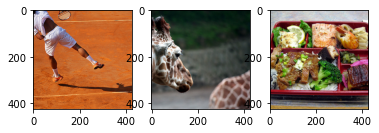

In [8]:
import matplotlib.pyplot as plt

print(train_betas.shape)
print(test_betas.shape) # dimensions of betas depend on the format selected, fsaverage is loaded here

print(len(train_captions)) # list of captions for each trial
print(len(test_captions))

print(train_imgs.shape)
print(test_imgs.shape)

trials = [42,43,44]

plt.figure()

for i in range(len(trials)):
    plt.subplot(131 + i)
    plt.imshow(train_imgs[i])
    print(train_captions[i])
plt.show()

Data can also be loaded in batches to save memory. This returns an iterator that loads one batch of data at a time:

In [12]:
batchdataloader = nsdl.load_batch_data(trialdata_train, batchsize=100, load_imgs=True)
b,c,i = batchdataloader.__next__()
print()

SESSION 1
loading annotations into memory...
Done (t=1.18s)
creating index...
index created!
loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
SESSION 2
loading annotations into memory...
Done (t=1.17s)
creating index...
index created!
loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


(array([[-0.6676476 ,  2.1811905 ,  2.2196305 , ...,  0.10999161,
          0.8483352 ,  1.1315404 ],
        [ 1.7314976 ,  3.199978  ,  0.49861804, ..., -0.53691816,
         -0.7301795 ,  1.2368646 ],
        [-0.43909064, -2.2382329 , -2.3999257 , ..., -0.26468527,
          1.5010138 , -1.0266182 ],
        ...,
        [ 0.8336213 , -0.2633083 ,  1.7321695 , ...,  1.4913822 ,
          1.1310964 ,  0.40799907],
        [ 0.1318295 , -0.48676038,  1.9384378 , ...,  0.19470064,
          0.50260097, -0.40767798],
        [-0.05056639,  0.0240349 ,  1.8562078 , ...,  0.02997114,
          1.1150633 , -0.89017105]], dtype=float32),
 [['A man and his shadow on a red tennis court while the man swings a tennis racket.',
   'A tennis player striking the ball with his shadow underneath him.',
   'A person is taken in this very picture.\n',
   "A tennis player's feet lift off the ground as he swings the racket.",
   'A man is returning the ball while playing tennis.'],
  ['Two giraffe walk